# Drug-Drug Interaction Prediction for Alimentary Tract and Metabolism Drugs

In [1]:
import pandas as pd

# Load the datasets
drug_interactions = pd.read_csv('raw_drug.csv')  # Replace with your actual path
drug_properties = pd.read_excel('raw_properties.xlsx')  # Replace with your actual path

# Merge Drug_A with its properties
drug_a_properties = pd.merge(
    drug_interactions, drug_properties,
    how='left',
    left_on='Drug_A',
    right_on='DrugName'
)

# Merge Drug_B with its properties
drug_b_properties = pd.merge(
    drug_interactions, drug_properties,
    how='left',
    left_on='Drug_B',
    right_on='DrugName'
)

# Select relevant columns for Drug_A properties and Drug_B properties
drug_a_properties = drug_a_properties[
    ['Drug_A', 'MolecularWeight', 'XLogP', 'ExactMass', 'TPSA']
]
drug_b_properties = drug_b_properties[
    ['Drug_B', 'MolecularWeight', 'XLogP', 'ExactMass', 'TPSA']
]

# Rename columns for clarity
drug_a_properties.columns = [
    'Drug_A', 'Drug_A_MolecularWeight', 'Drug_A_XLogP', 'Drug_A_ExactMass', 'Drug_A_TPSA'
]
drug_b_properties.columns = [
    'Drug_B', 'Drug_B_MolecularWeight', 'Drug_B_XLogP', 'Drug_B_ExactMass', 'Drug_B_TPSA'
]

# Combine the two property sets with the original interaction data
final_dataset = pd.concat([
    drug_interactions[['Drug_A', 'Drug_B', 'Level']],
    drug_a_properties.drop(columns=['Drug_A']),
    drug_b_properties.drop(columns=['Drug_B'])
], axis=1)

# Save the final dataset to a CSV file
final_dataset.to_csv('final_drug_interaction_properties.csv', index=False)

print("Final merged dataset saved to 'final_drug_interaction_properties.csv'")


Final merged dataset saved to 'final_drug_interaction_properties.csv'


In [2]:
# Dropping rows with null values
final_dataset_cleaned = final_dataset.dropna()

# Dropping duplicate rows
final_dataset_cleaned = final_dataset_cleaned.drop_duplicates()

# Displaying the cleaned dataset
print(final_dataset_cleaned)

# Saving the cleaned dataset to a new CSV file
final_dataset_cleaned.to_csv("cleaned.csv", index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'.")


               Drug_A                   Drug_B     Level  \
0          Naltrexone                 Abacavir  Moderate   
1            Abacavir                 Orlistat  Moderate   
3          Aprepitant             Dolutegravir     Minor   
13         Cimetidine             Dolutegravir     Minor   
14     Clarithromycin             Dolutegravir     Minor   
...               ...                      ...       ...   
41567    Troglitazone            Trovafloxacin  Moderate   
41574            Urea          Phenolphthalein  Moderate   
41579     Vinblastine  Glycerol phenylbutyrate  Moderate   
41580    Troglitazone              Vinblastine  Moderate   
41584    Troglitazone                Yohimbine  Moderate   

       Drug_A_MolecularWeight  Drug_A_XLogP  Drug_A_ExactMass  Drug_A_TPSA  \
0                     341.400           1.9        341.162708         70.0   
1                     286.330           0.9        286.154209        102.0   
3                     534.400           4.2  

# Data Loading and Analysis


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data = pd.read_csv("cleaned.csv")

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Dataset Head:
           Drug_A        Drug_B     Level  Drug_A_MolecularWeight  \
0      Naltrexone      Abacavir  Moderate                  341.40   
1        Abacavir      Orlistat  Moderate                  286.33   
2      Aprepitant  Dolutegravir     Minor                  534.40   
3      Cimetidine  Dolutegravir     Minor                  252.34   
4  Clarithromycin  Dolutegravir     Minor                  748.00   

   Drug_A_XLogP  Drug_A_ExactMass  Drug_A_TPSA  Drug_B_MolecularWeight  \
0           1.9        341.162708         70.0                  286.33   
1           0.9        286.154209        102.0                  495.70   
2           4.2        534.150188         75.2                  419.40   
3           0.4        252.115716        114.0                  419.40   
4           3.2        747.476891        183.0                  419.40   

   Drug_B_XLogP  Drug_B_ExactMass  Drug_B_TPSA  
0           0.9        286.154209        102.0  
1          10.0        495.3

C:\Users\jksan\AppData\Local\Temp\ipykernel_46692\408197596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Level", data=data, palette="viridis")


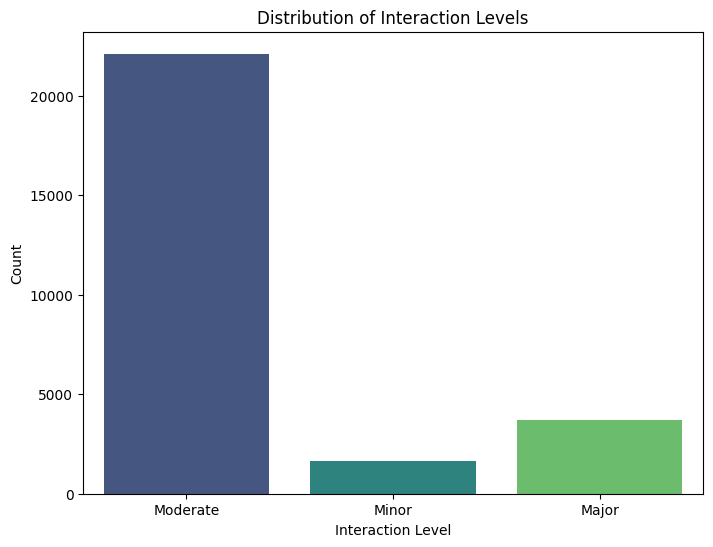

In [4]:
# Plot the count of interaction levels
plt.figure(figsize=(8, 6))
sns.countplot(x="Level", data=data, palette="viridis")
plt.title("Distribution of Interaction Levels")
plt.xlabel("Interaction Level")
plt.ylabel("Count")
plt.show()


In [5]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv("cleaned.csv")

# Create a mapping for Drug IDs
unique_drugs = pd.unique(data[['Drug_A', 'Drug_B']].values.ravel('K'))
drug_id_map = {drug: idx for idx, drug in enumerate(unique_drugs, start=1)}

# Map Drug IDs to Drug_A and Drug_B columns
data['Drug_A_ID'] = data['Drug_A'].map(drug_id_map)
data['Drug_B_ID'] = data['Drug_B'].map(drug_id_map)

# Create a mapping for Interaction Level
level_id_map = {'Major': 3, 'Moderate': 2, 'Minor': 1}
data['Level_ID'] = data['Level'].map(level_id_map)

# Save the updated dataset
data.to_csv("mlset.csv", index=False)

# Display the first few rows to verify
print(data.head())


           Drug_A        Drug_B     Level  Drug_A_MolecularWeight  \
0      Naltrexone      Abacavir  Moderate                  341.40   
1        Abacavir      Orlistat  Moderate                  286.33   
2      Aprepitant  Dolutegravir     Minor                  534.40   
3      Cimetidine  Dolutegravir     Minor                  252.34   
4  Clarithromycin  Dolutegravir     Minor                  748.00   

   Drug_A_XLogP  Drug_A_ExactMass  Drug_A_TPSA  Drug_B_MolecularWeight  \
0           1.9        341.162708         70.0                  286.33   
1           0.9        286.154209        102.0                  495.70   
2           4.2        534.150188         75.2                  419.40   
3           0.4        252.115716        114.0                  419.40   
4           3.2        747.476891        183.0                  419.40   

   Drug_B_XLogP  Drug_B_ExactMass  Drug_B_TPSA  Drug_A_ID  Drug_B_ID  Level_ID  
0           0.9        286.154209        102.0          1  

In [6]:
import pandas as pd

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv('mlset.csv')

# Step 3: Drop 'Drug_A', 'Drug_B', and 'Level' columns
df = df.drop(columns=['Drug_A', 'Drug_B', 'Level'])

# Step 4: Reorder the columns
df = df[['Drug_A_ID', 'Drug_A_MolecularWeight', 'Drug_A_XLogP', 'Drug_A_ExactMass', 'Drug_A_TPSA',
         'Drug_B_ID', 'Drug_B_MolecularWeight', 'Drug_B_XLogP', 'Drug_B_ExactMass', 'Drug_B_TPSA', 'Level_ID']]

# Step 5: Save the modified DataFrame to a new CSV file
df.to_csv('new_drug_data.csv', index=False)




# Plotting of HeatMap

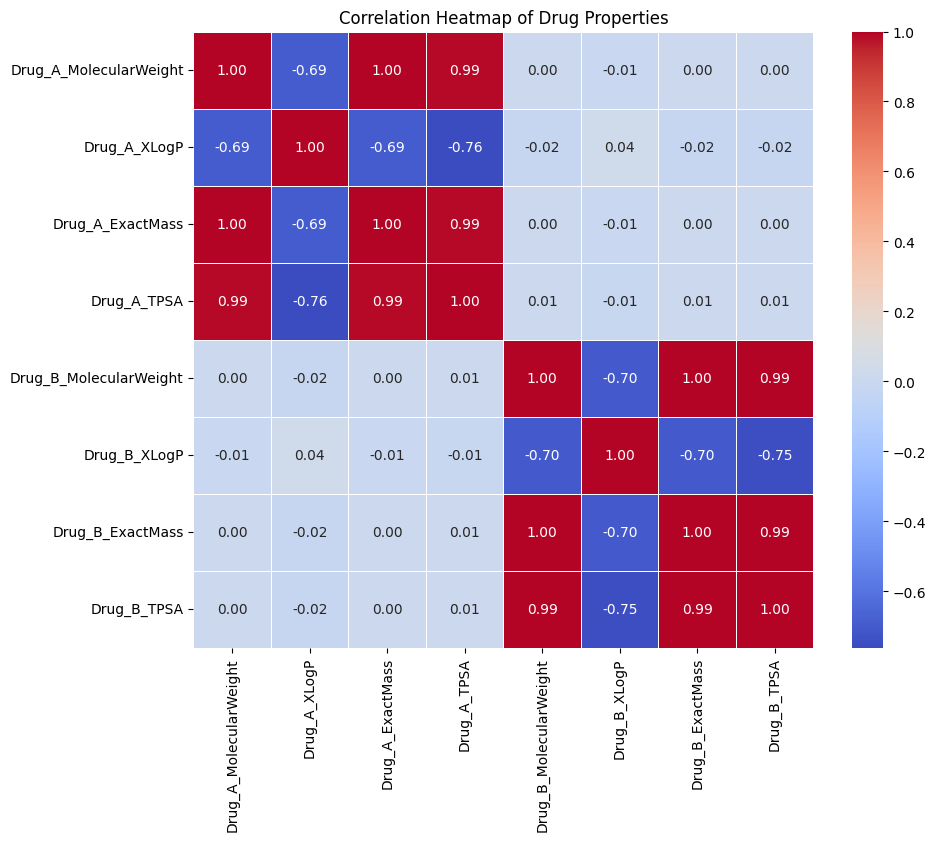

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Read the modified CSV file
df = pd.read_csv('new_drug_data.csv')

# Step 3: Select numerical columns for the heatmap (exclude non-numerical columns like IDs)
numerical_df = df[['Drug_A_MolecularWeight', 'Drug_A_XLogP', 'Drug_A_ExactMass', 'Drug_A_TPSA',
                   'Drug_B_MolecularWeight', 'Drug_B_XLogP', 'Drug_B_ExactMass', 'Drug_B_TPSA']]

# Step 4: Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 6: Show the plot
plt.title('Correlation Heatmap of Drug Properties')
plt.show()
